# Installing Required Packages:
To begin the project, it's essential to install the required Python libraries. These libraries will help with data preprocessing, visualization, machine learning model building, and creating the Streamlit interface. The key packages include:

Pandas: For handling and preprocessing data.
NumPy: For numerical operations.
Scikit-learn: For machine learning models and techniques like data splitting, outlier detection, and transformations.
Seaborn and Matplotlib: For visualizing skewness, outliers, and data relationships.
Streamlit: For creating an interactive web application.
Pickle: For saving and loading models and preprocessing pipelines.

In [2]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE

In [3]:
# Loading the Dataset
df=pd.read_csv(r"C:\Users\ELCOT\Downloads\Copper_Set.xlsx - Result 1.csv")

# Exploring the Dataset: Basic Overview


In [4]:
df.shape

(181673, 14)

In [5]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [6]:
df.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

# Converting and Engineering Features

To preprocess the dataset, I converted date columns (item_date and delivery date) into a proper date format and ensured numerical columns, such as quantity tons, customer, and selling_price, were converted to numeric types to handle any invalid values. Additionally, I cleaned the material_ref column by stripping leading zeroes and applied necessary type transformations to other columns for consistent formatting.

In [7]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [8]:
df.describe()

,quantity tons,customer,country,application,thickness,width,product_ref,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05
mean,5.874926e+03,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,1.918036e+03
std,2.349081e+06,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,3.317956e+05
min,-2.000000e+03,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1.160000e+03
25%,1.097030e+01,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,6.690000e+02
50%,3.036464e+01,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,8.120000e+02
75%,6.716061e+01,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,9.530000e+02
max,1.000000e+09,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,1.000010e+08


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181670 non-null  object 
 2   quantity tons  181672 non-null  float64
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181670 non-null  object 
 13  selling_price  181672 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 19.4+ MB


# Missing Value Imputation
Missing values in the material_ref column were replaced with 'unknown' to handle null entries and maintain consistency in the dataset.

In [10]:
df['material_ref'].fillna('unknown', inplace=True)

In [11]:
df.isnull().sum()

id                2
item_date         3
quantity tons     1
customer          1
country          28
status            2
item type         0
application      24
thickness         1
width             0
material_ref      0
product_ref       0
delivery date     3
selling_price     1
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df['quantity tons'] = df['quantity tons'].apply(lambda x: np.nan if x<=0 else x)
df['selling_price'] = df['selling_price'].apply(lambda x: np.nan if x<=0 else x)
df.isnull().sum()

id               0
item_date        0
quantity tons    4
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    7
dtype: int64

In [14]:
df = df.dropna()
df.isnull().sum()

id               0
item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [15]:
df1 = df.copy()
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00


In [16]:

df1.shape

(181620, 14)

# Visualization Function, Encoding
I defined a function plot() to visualize the distribution and spread of a specific column in the dataset using three types of plots: boxplot, histogram with KDE, and violin plot. These visualizations help identify outliers, skewness, and the overall distribution of the data for further analysis.

In [17]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,3,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,3,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    plt.show()

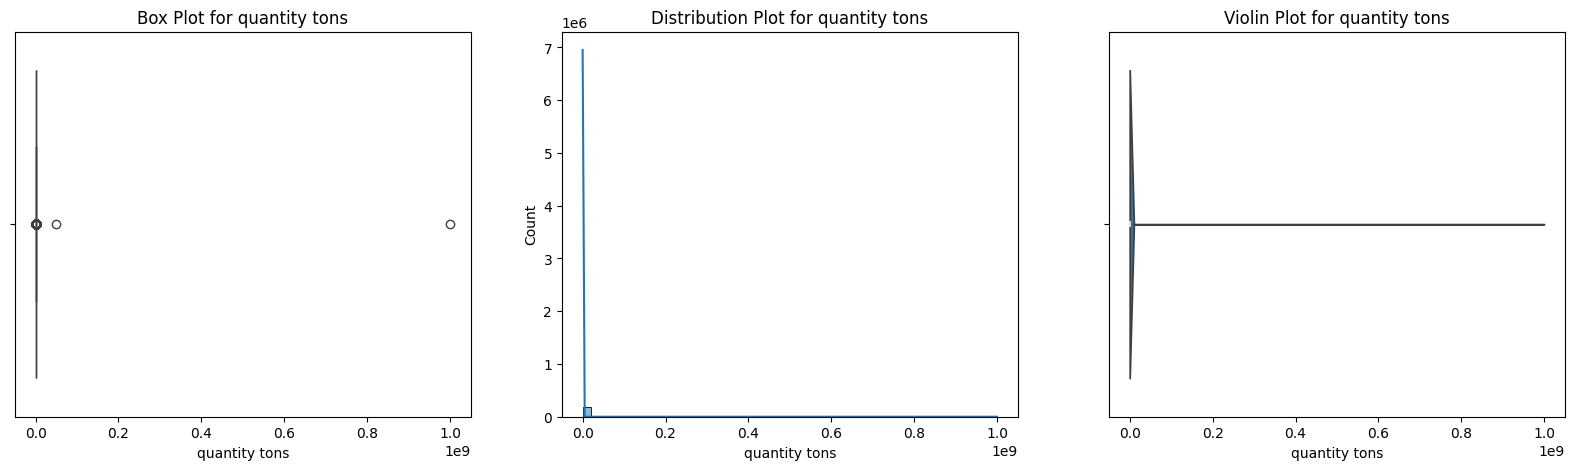

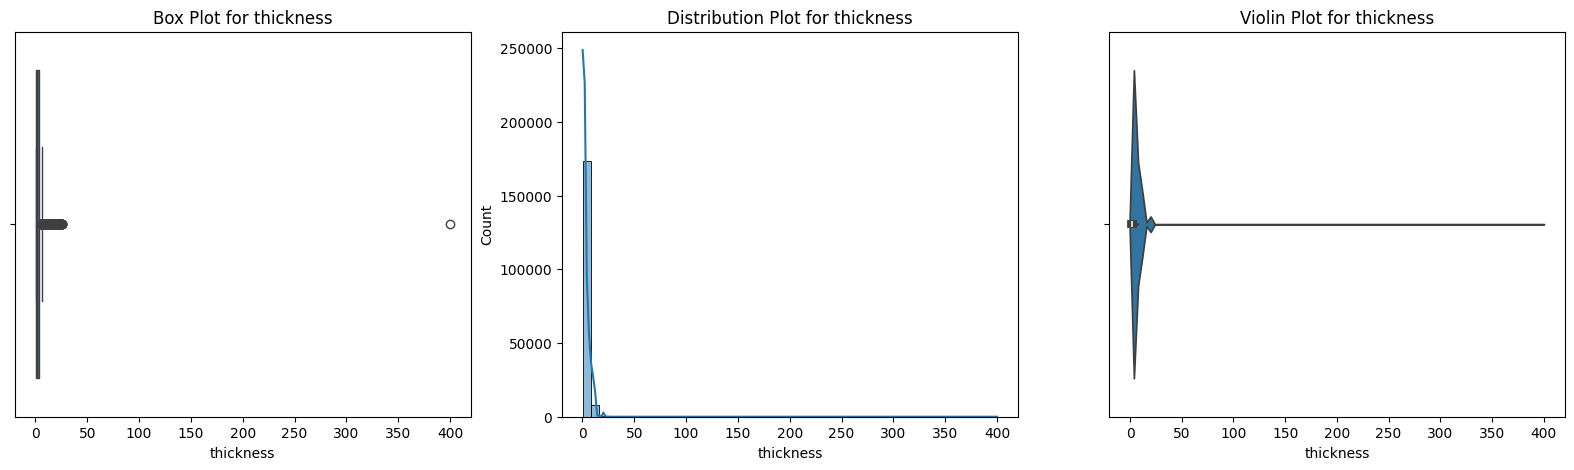

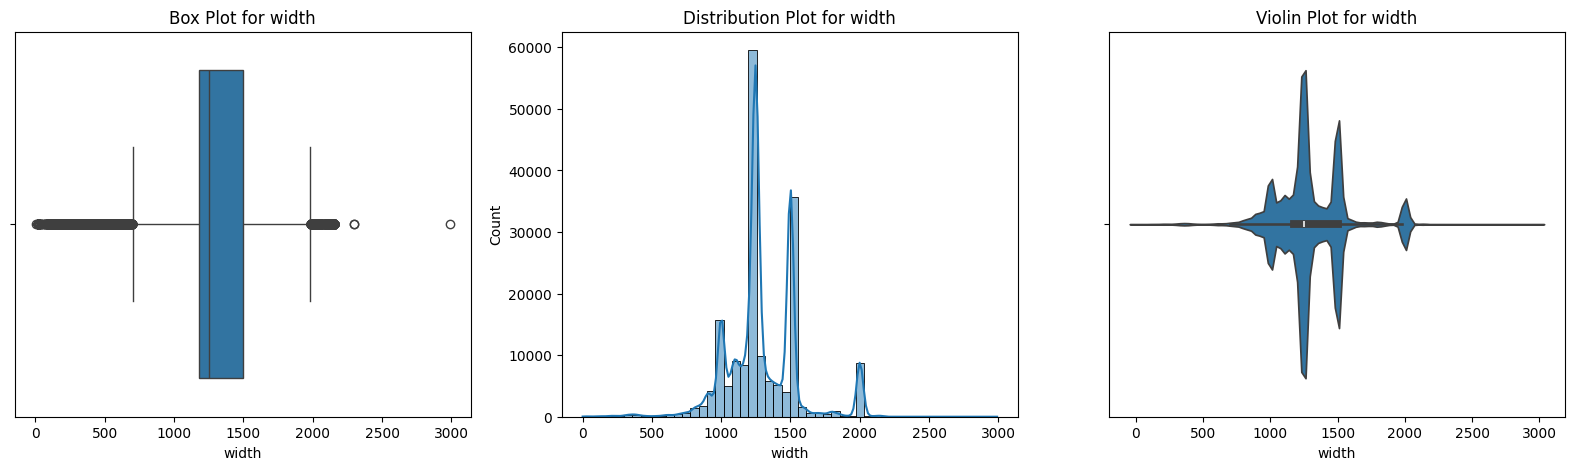

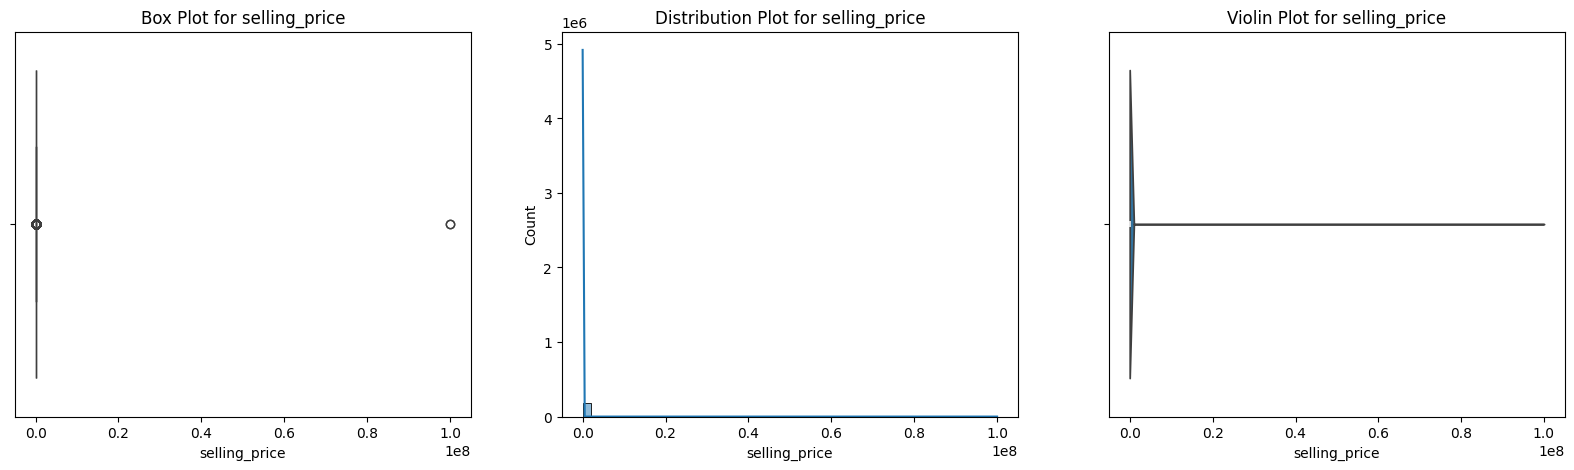

In [18]:
for i in ['quantity tons', 'thickness', 'width', 'selling_price']:
    plot(df1, i)

I applied a log transformation to the selling_price, quantity tons, and thickness columns to address skewness and reduce the impact of extreme values. 

This step resulted in smaller values, but it's expected after the transformation. Since tree-based models are not sensitive to feature scaling, I proceeded with training the model without using StandardScaler. If using linear models, scaling would be recommended after the log transformation.

In [19]:
df1['quantity tons_log'] = np.log(df1['quantity tons'])
df1['thickness_log'] = np.log(df1['thickness'])
df1['selling_price_log'] = np.log(df1['selling_price'])
df1.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842


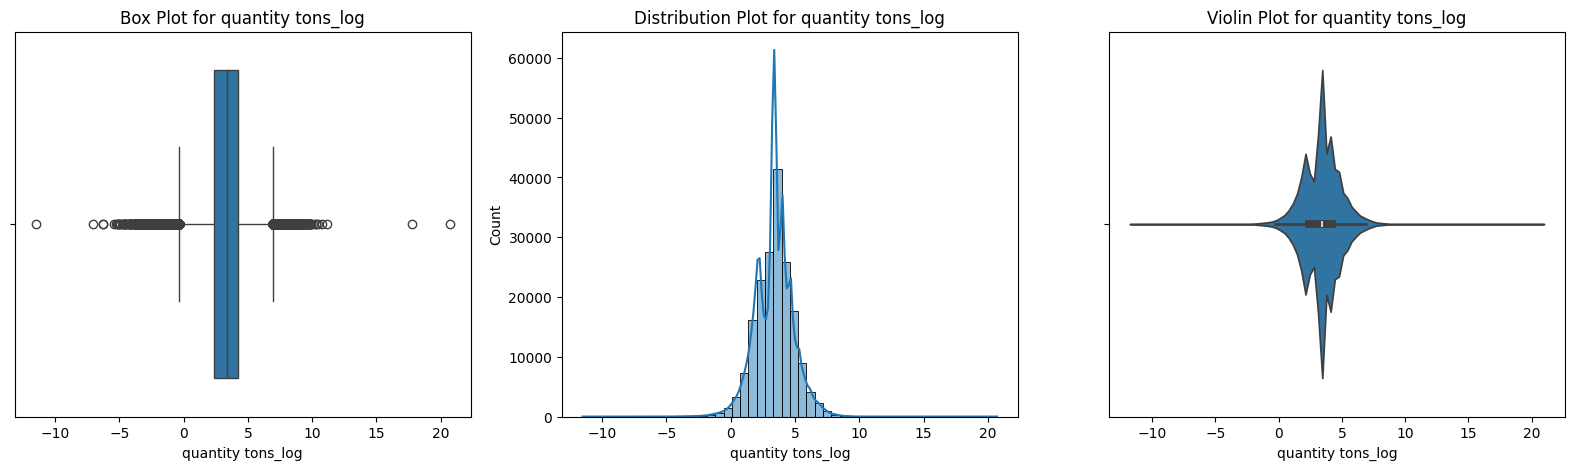

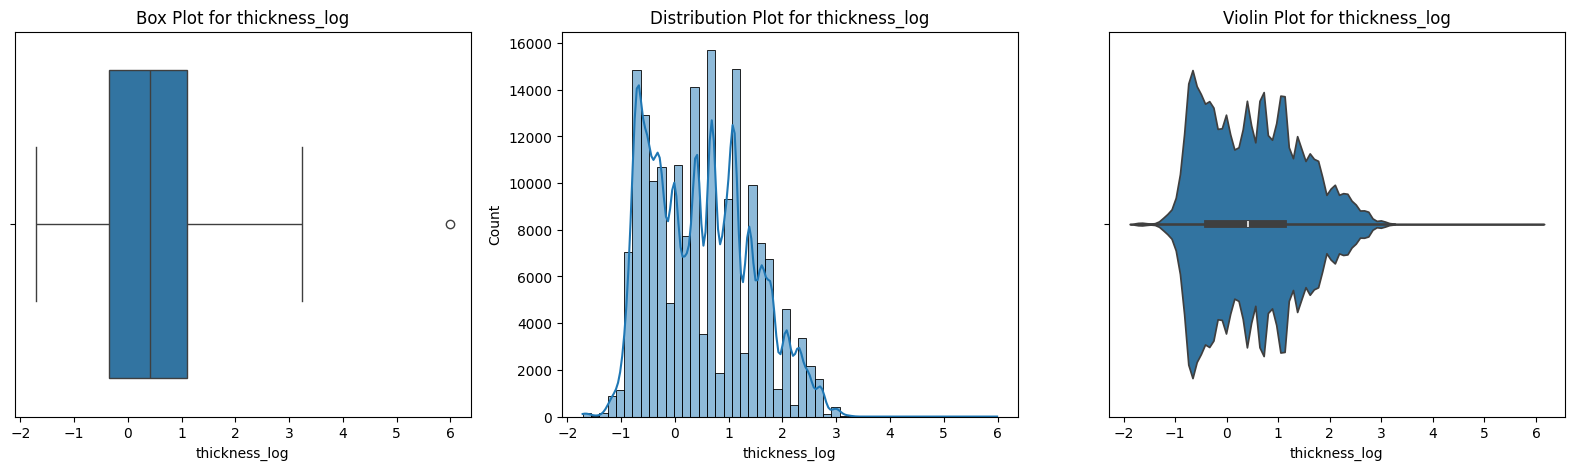

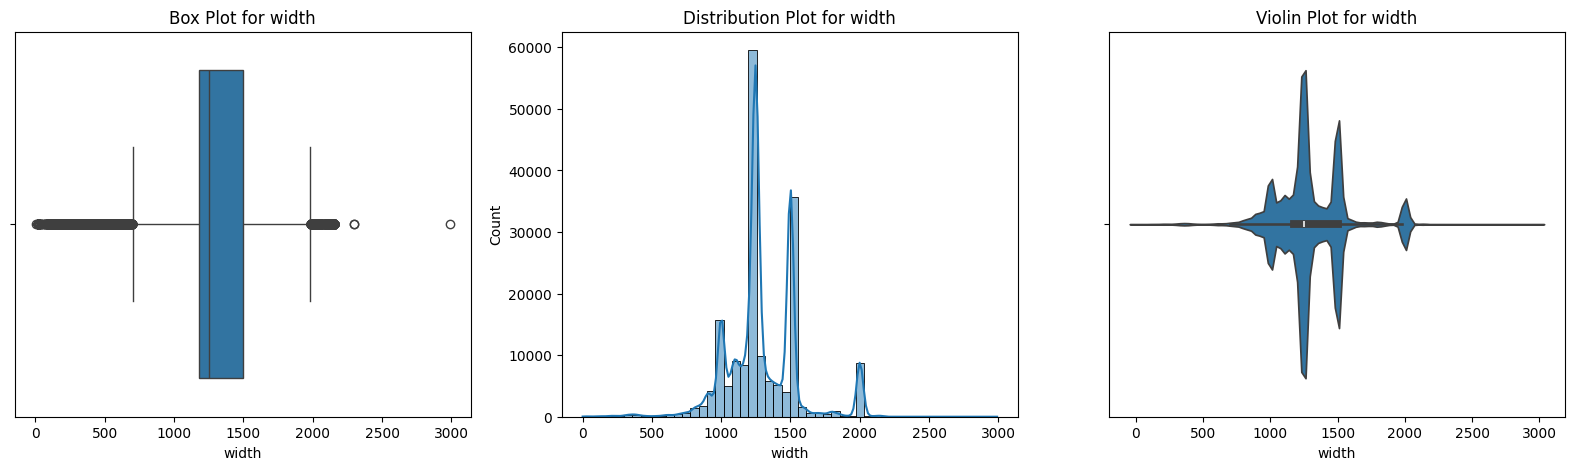

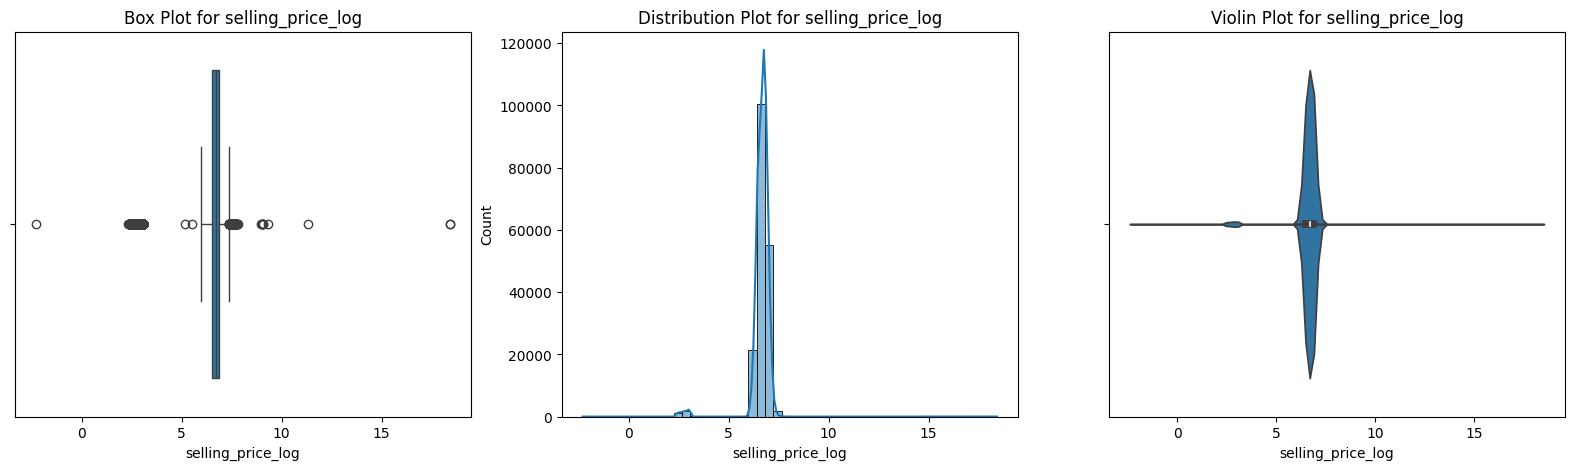

In [20]:
for i in ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']:
    plot(df1, i)

In [21]:
numerical_cols = ['quantity tons_log', 'thickness_log', 'width', 'selling_price_log']


correlation_matrix = df1[numerical_cols].corr()


print(correlation_matrix)

                   quantity tons_log  thickness_log     width  \
quantity tons_log           1.000000       0.042005  0.034431   
thickness_log               0.042005       1.000000  0.387243   
width                       0.034431       0.387243  1.000000   
selling_price_log           0.023898      -0.154999 -0.069453   

                   selling_price_log  
quantity tons_log           0.023898  
thickness_log              -0.154999  
width                      -0.069453  
selling_price_log           1.000000  


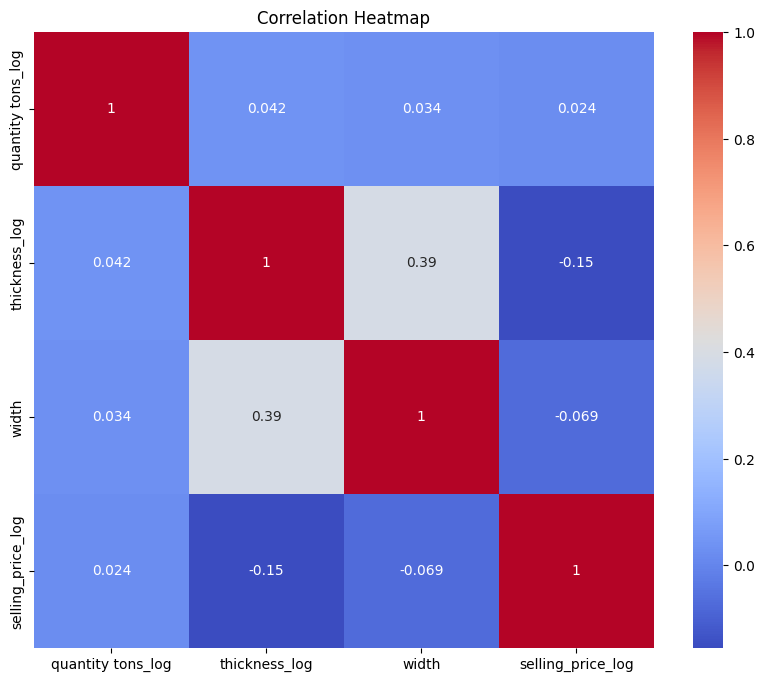

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

I used the OrdinalEncoder for encoding the status and item type columns because it assigns integer values (e.g., 1, 2, 3, 4), which is easier to handle in the Streamlit app. 

OneHotEncoder would create multiple columns, making the process more complex in the app.

 Ordinal encoding simplifies the implementation by providing a single column for each categorical feature.



In [23]:
OE = OrdinalEncoder()
df1['status_en'] = OE.fit_transform(df1[['status']])
df1['item type_en'] = OE.fit_transform(df1[['item type']])
df1

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item type_en
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257,7.0,5.0
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816,7.0,5.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426,7.0,5.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105,7.0,5.0


In [24]:
df1.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price', 'quantity tons_log',
       'thickness_log', 'selling_price_log', 'status_en', 'item type_en'],
      dtype='object')

In [25]:
item_type_mapping = pd.DataFrame({
    'item type': df1['item type'].unique(),
    'item type_en': df1['item type_en'].unique()
})

item_type_mapping

,item type,item type_en
0,W,5.0
1,WI,6.0
2,S,3.0
3,Others,1.0
4,PL,2.0
5,IPL,0.0
6,SLAWR,4.0


In [26]:
status_mapping = pd.DataFrame({
    'status': df1['status'].unique(),
    'status_en': df1['status_en'].unique()
})

status_mapping

,status,status_en
0,Won,7.0
1,Draft,0.0
2,To be approved,6.0
3,Lost,1.0
4,Not lost for AM,2.0
5,Wonderful,8.0
6,Revised,5.0
7,Offered,4.0
8,Offerable,3.0


# Defining Features (x) and Target (y) for Model Training


In [27]:
x=df1[['quantity tons_log','status_en','item type_en','application','thickness_log','width','country','customer','product_ref']]
y=df1['selling_price_log']

# Splitting Data into Training and Testing Sets


In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(127134, 9)
(54486, 9)
(127134,)
(54486,)


# Training and Evaluating Multiple Models


In [29]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

y_pred = dtr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.0348446030425254
R-squared: 0.8924760163736941


In [30]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Mean squared error: 0.020728189056426132
R-squared: 0.93603665227622


I trained two models: DecisionTreeRegressor and RandomForestRegressor. The DecisionTreeRegressor gave an R-squared score of 89%, while the RandomForestRegressor achieved an R-squared score of 93.5%. Based on this performance, I selected the RandomForestRegressor for the final model.



In [31]:
# Split a smaller subset for tuning
x_tune, _, y_tune, _ = train_test_split(x_train, y_train, test_size=0.8, random_state=42)

#Define the parameter grid
param_dist = {
    'n_estimators': randint(50, 100),
    'max_depth': [10, 20, None],
    'min_samples_split': randint(2, 5),
    'min_samples_leaf': randint(1, 3),
    'max_features': ['sqrt', 'log2']
}


rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  
    cv=3,      
    scoring='r2',
    verbose=2,
    random_state=10,
    n_jobs=-1
)


random_search.fit(x_tune, y_tune)


best_params = random_search.best_params_
print("Best Parameters:", best_params)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 86}


Subset Split for Tuning: Split a smaller subset of the training data (x_train, y_train) using train_test_split with a test size of 80% to create the tuning dataset (x_tune, y_tune).

Define Parameter Grid: Created a parameter grid (param_dist) for the RandomForestRegressor with hyperparameters like n_estimators, max_depth, min_samples_split, min_samples_leaf, and max_features.

RandomizedSearchCV Setup: Used RandomizedSearchCV with:

n_iter=20 (20 random iterations)
cv=3 (3-fold cross-validation)
scoring='r2' (R-squared as the evaluation metric)
n_jobs=-1 (using all available processors)
Set a random_state for reproducibility.
Model Fitting: Ran the randomized search on the subset data to find the best hyperparameters.

Retrieve Best Parameters: Retrieved the best-found parameters using random_search.best_params_ and printed them.

# Retraining the Final Model and Evaluating Performance on Test Set


In [32]:
final_model = RandomForestRegressor(
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=86,
    random_state=10
)

final_model.fit(x_train, y_train)


y_pred = final_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test R² Score: {r2}")
print(f"Test Mean Absolute Error (MAE): {mae}")

Test R² Score: 0.9365332741249932
Test Mean Absolute Error (MAE): 0.11111921124739252


# Predicting selling price for new sample


In [33]:
new_quantity_tons_log = np.log(40)
status_en = 5.0
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 28
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

new_sample = np.array([[new_quantity_tons_log, status_en, item_type_en, application,
                         new_thickness_log, new_width, country, new_customer, new_product_ref]])

new_pred = final_model.predict(new_sample)[0]


print("Selling Price:", np.exp(new_pred))

Selling Price: 573.5493727804642


# Save the model using pickle


In [34]:
with open('selling_price_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

After training the final model, I used it to predict new values and saved the trained model using the pickle module for future use. This allows for easy predictions without retraining the model.














# Model Performance and Feature Importance Visualization


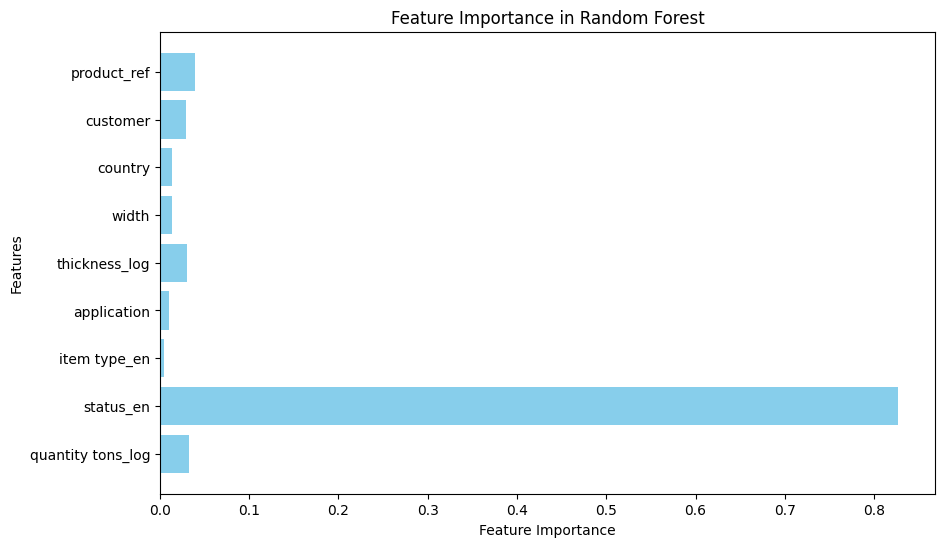

In [35]:
feature_importances = final_model.feature_importances_
feature_names = x_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

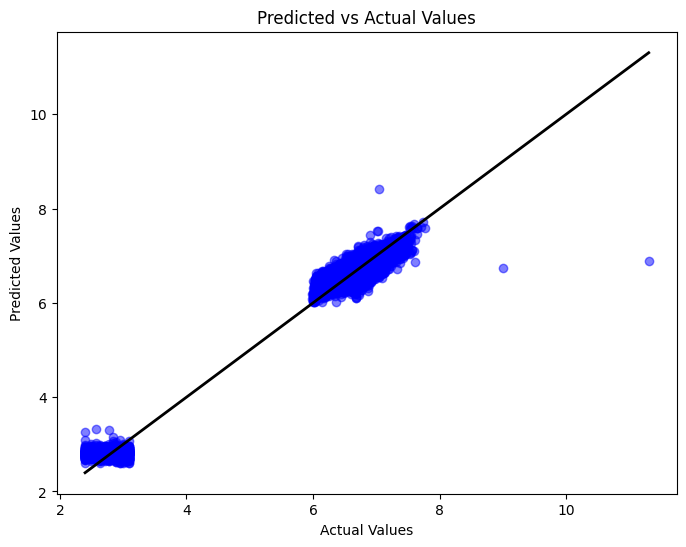

In [36]:
# Predicted vs Actual Values

plt.figure(figsize=(8, 6))
plt.scatter(y_test, final_model.predict(x_test), color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.show()

# Classification model for predicting status


In [ ]:
# Define DataFrame

In [37]:
df2 = df1.copy()
df2.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item type_en
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0


In [38]:
df3 = df2[df2['status'].isin(['Won', 'Lost'])]
df3

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item type_en
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257,7.0,5.0
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816,7.0,5.0
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426,7.0,5.0
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105,7.0,5.0


In [39]:
df3["status"].value_counts()

status
Won     115996
Lost     34431
Name: count, dtype: int64

In the first step of building the status classification model, I encoded the 'status' column by mapping the values "Won" to 1 and "Lost" to 0 using the map() function. This prepares the data for model training by converting the categorical 'status' values into numerical form.








In [40]:
df3["status_encoded"] = df3['status'].map({"Won":1, "Lost":0})
df3

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,quantity tons_log,thickness_log,selling_price_log,status_en,item type_en,status_encoded
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,3.991779,0.693147,6.749931,7.0,5.0,1
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,104991,1668701718,2021-04-01,1047.00,6.643822,-0.223144,6.953684,7.0,5.0,1
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,5.956169,-0.967584,6.468211,7.0,6.0,1
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,5.310301,0.832909,6.643790,7.0,3.0,1
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,6.666354,1.386294,6.357842,7.0,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181667,0B812591-B501-4F34-859A-B06381FAEB44,2020-07-02,106.783299,30200854.0,25.0,Won,W,41.0,0.96,1240.0,1000222,164141591,2020-07-01,602.00,4.670802,-0.040822,6.400257,7.0,5.0,1
181668,DE633116-D1DF-4846-982E-55EFC3658A76,2020-07-02,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,1000777,164141591,2020-07-01,591.00,4.629691,-0.040822,6.381816,7.0,5.0,1
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,2020-07-02,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,1000227,164141591,2020-07-01,589.00,5.337954,-0.051293,6.378426,7.0,5.0,1
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,2020-07-02,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,1004216,164141591,2020-07-01,619.00,1.443523,-0.342490,6.428105,7.0,5.0,1


In [41]:
df4 = df3[['quantity tons_log','selling_price_log','item type_en', 'application','thickness_log',
           'width','country','customer','product_ref','status_encoded']]
df4

,quantity tons_log,selling_price_log,item type_en,application,thickness_log,width,country,customer,product_ref,status_encoded
0,3.991779,6.749931,5.0,10.0,0.693147,1500.0,28.0,30156308.0,1670798778,1
1,6.643822,6.953684,5.0,41.0,-0.223144,1210.0,25.0,30202938.0,1668701718,1
2,5.956169,6.468211,6.0,28.0,-0.967584,952.0,30.0,30153963.0,628377,1
3,5.310301,6.643790,3.0,59.0,0.832909,1317.0,32.0,30349574.0,1668701718,1
4,6.666354,6.357842,5.0,10.0,1.386294,2000.0,28.0,30211560.0,640665,1
...,...,...,...,...,...,...,...,...,...,...
181667,4.670802,6.400257,5.0,41.0,-0.040822,1240.0,25.0,30200854.0,164141591,1
181668,4.629691,6.381816,5.0,41.0,-0.040822,1220.0,25.0,30200854.0,164141591,1
181669,5.337954,6.378426,5.0,41.0,-0.051293,1500.0,25.0,30200854.0,164141591,1
181670,1.443523,6.428105,5.0,41.0,-0.342490,1250.0,25.0,30200854.0,164141591,1


In [42]:
df4["status_encoded"].value_counts()

status_encoded
1    115996
0     34431
Name: count, dtype: int64

# Oversampling with SMOTE and Defining Features (x) and Target (y) for Model Training
To address the class imbalance in the 'status_encoded' column, where "Won" (1) is significantly higher than "Lost" (0), I used the SMOTE (Synthetic Minority Over-sampling Technique) method. SMOTE helps by generating synthetic samples for the minority class, balancing the dataset before training the classification model.








In [43]:
x = df4.drop(["status_encoded"], axis=1)
y = df4["status_encoded"]

In [44]:
sm = SMOTE(random_state=42)
x_res, y_res = sm.fit_resample(x,y)

In [45]:
y_res.value_counts()

status_encoded
1    115996
0    115996
Name: count, dtype: int64

In [46]:
y_res.shape

(231992,)

In [47]:
len(x_res)

231992

# Splitting Data into Training and Testing Sets


In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 0.3, random_state = 5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(162394, 9)
(69598, 9)
(162394,)
(69598,)


# Training and Evaluating Multiple Models


In [49]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[32603  2408]
 [ 2594 31993]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93     35011
           1       0.93      0.93      0.93     34587

    accuracy                           0.93     69598
   macro avg       0.93      0.93      0.93     69598
weighted avg       0.93      0.93      0.93     69598



In [50]:
final_model1 = RandomForestClassifier()
final_model1.fit(x_train, y_train)

y_pred = final_model1.predict(x_test)

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:")
print(result1)

Confusion Matrix:
[[34054   957]
 [ 2090 32497]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96     35011
           1       0.97      0.94      0.96     34587

    accuracy                           0.96     69598
   macro avg       0.96      0.96      0.96     69598
weighted avg       0.96      0.96      0.96     69598



# Predicting status for new sample


In [51]:
 # Define the values for the new sample
new_quantity_tons_log = np.log(40)
selling_price_log = np.log(50)
item_type_en = 4.0
application = 20.0
new_thickness_log = np.log(250)
new_width = 1500.0
country = 25.0
new_customer = 30202938
new_product_ref = 1670798778

# Create the new sample as a numpy array
new_sample = np.array([[new_quantity_tons_log, selling_price_log, item_type_en, application,
                         new_thickness_log, new_width, country, new_customer, new_product_ref]])

# Make predictions using the trained RandomForestRegressor model
new_pred = final_model1.predict(new_sample)

if new_pred==1:
    print('The status is: Won')
else:
    print('The status is: Lost')

The status is: Won


After training two models for the status prediction, I selected the Random Forest Classifier (RFC) based on its performance. The model achieved an accuracy of 96% in the confusion matrix. Afterward, I used the trained model to predict the status and saved it for future use.








# save the model using pickle


In [52]:
with open('status_model.pkl', 'wb') as file:
    pickle.dump(final_model1, file)

# Model Performance and Feature Importance Visualization


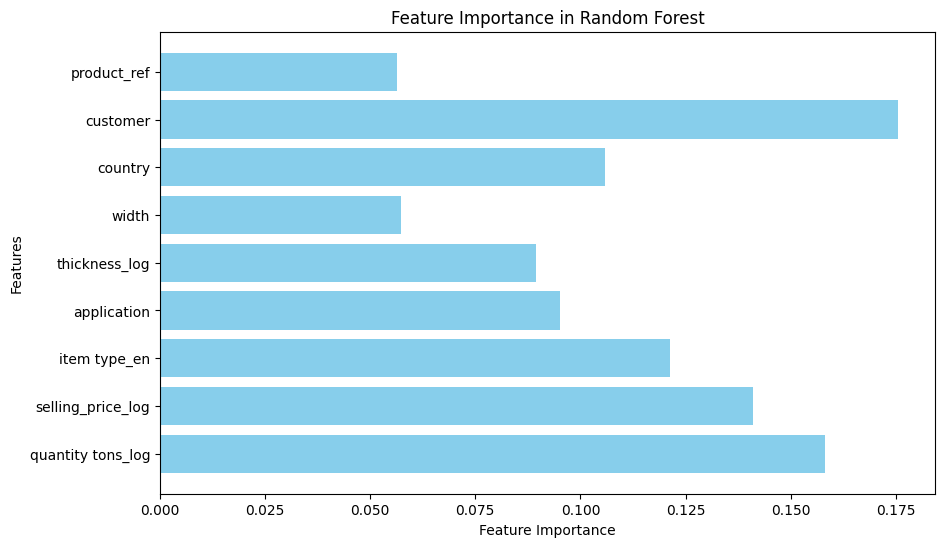

In [53]:
feature_importances = final_model1.feature_importances_
feature_names = x_train.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()

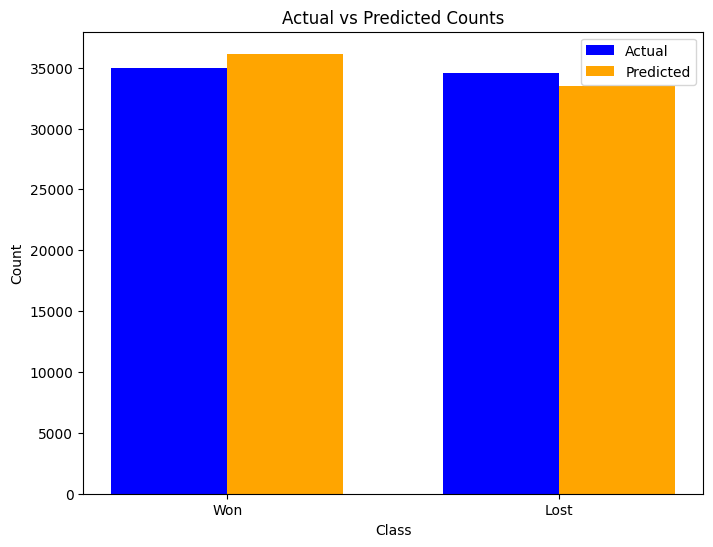

In [54]:
label_mapping = {1: 'Lost', 0: 'Won'}

actual_vs_predicted = pd.DataFrame({
    'Actual': pd.Series(y_test).map(label_mapping),  
    'Predicted': pd.Series(final_model1.predict(x_test)).map(label_mapping) 
})

counts_actual = actual_vs_predicted['Actual'].value_counts()
counts_predicted = actual_vs_predicted['Predicted'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.35
classes = ['Won', 'Lost'] 


ax.bar([x - bar_width / 2 for x in range(len(classes))], counts_actual[classes], bar_width, label='Actual', color='blue')
ax.bar([x + bar_width / 2 for x in range(len(classes))], counts_predicted[classes], bar_width, label='Predicted', color='orange')

ax.set_xticks(range(len(classes)))
ax.set_xticklabels(classes)
ax.set_xlabel('Class')
ax.set_ylabel('Count')
ax.set_title('Actual vs Predicted Counts')
ax.legend()
plt.show()

# In this project

1. Data Preprocessing:

Handled missing values, skewness, and outliers.
Applied appropriate transformations, such as log transformations for continuous variables.
Encoded categorical variables using OrdinalEncoder to simplify the model-building process.


2. Model Building:

Trained two models: a Random Forest Regressor for predicting selling price and a Random Forest Classifier for predicting lead status (Won/Lost).
Used RandomizedSearchCV to tune hyperparameters for improved model performance.


3. Model Evaluation:

Achieved an R-squared score of 93% for the regression model.
Achieved 96% accuracy in the classification model using the Random Forest Classifier.


4. Handling Imbalanced Data:

Applied SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset for the classification model.

